In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import scipy.misc
import pdb
from skimage.io import imsave
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
import glob
import os


# this part save the rails images (left and right in blue and red respectively)
# focalfor video 0: 1801.5909135560134

video_focals = []
s = 1

for file in glob.glob("/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/detect_rails/*.jpg"):
    frame = cv2.imread(file)
    s += 1
    # detect the green color (green rails) and show only the rails
    
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    im_pil = Image.fromarray(img)

    
    lower_green = np.array([0, 50, 0])
    upper_green = np.array([0, 255, 0])


    mask = cv2.inRange(frame, lower_green, upper_green)
    res = cv2.bitwise_and(frame, frame, mask=mask)


    #changed the mask into rgb image
    im = Image.fromarray(res, 'RGB')
    
    # create right rail array

    right_rail = np.zeros([1080, 2])
    right = 0

    for y in range(frame.shape[0]): #1080
        for x in range(frame.shape[1]): #1080
            width = x
            hight =  y
            r, g, b = im.getpixel((width, hight))
            if g != 0 and width > 977:
                right_rail[right] = width ,hight 
                right += 1
                break
                
    # squeeze zeros 
    right_rail = right_rail[~np.all(right_rail == 0, axis=1)]


    # take two at random and link them 
    right_rail_up = right_rail[40:45]
    right_rail_down = right_rail[right_rail.shape[0]-10:]

    d = ImageDraw.Draw(im)
    d1 = ImageDraw.Draw(im_pil)
    
    bottom = ( right_rail_down[np.argmin(right_rail_down[:,0])][0]  ,right_rail_down[np.argmin(right_rail_down[:,0])][1])
    top = (right_rail_up[np.argmin(right_rail_up[:,0])][0]  ,right_rail_up[np.argmin(right_rail_up[:,0])][1])
    
    line_color = (255, 0, 0)
    
    d.line([bottom, top], fill=line_color, width=1)
    d1.line([bottom, top], fill=line_color, width=1)

    
    im1 = np.array(im)
    im2 = np.array(im_pil)
    
    base_name = os.path.splitext(os.path.basename(os.path.normpath(file)))[0]
    plt.imsave('/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/'+ base_name,im1)
    plt.imsave('/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/draw/'+ base_name,im2)

        # create left rail 
    left_rail = np.zeros([1080, 2])

    for y in range(frame.shape[0]): #1080
        for x in range(frame.shape[1]): #1080
            width = x
            hight =  y
            r, g, b = im.getpixel((width, hight))
            if g != 0 and width < 950:
                left_rail[y] = width ,hight             

    # squeeze zeros    
    left_rail = left_rail[~np.all(left_rail == 0, axis=1)]

        # take two at random and link them 
    left_rail_up = left_rail[50:60] 
    # if statement to add more points
    left_rail_down = left_rail[left_rail.shape[0]-10:]

    d = ImageDraw.Draw(im)
    d1 = ImageDraw.Draw(im_pil)
    
    top = ( left_rail_down[np.argmax(left_rail_down[:,0])][0] ,left_rail_down[np.argmax(left_rail_down[:,0])][1])
    left = (left_rail_up[np.argmax(left_rail_up[:,0])][0]  ,left_rail_up[np.argmax(left_rail_up[:,0])][1])

    line_color = (0, 0, 255)
    
    d.line([top, left], fill=line_color, width=1)
    d1.line([top, left], fill=line_color, width=1)

    im1 = np.array(im)
    im2 = np.array(im_pil)

    base_name = os.path.splitext(os.path.basename(os.path.normpath(file)))[0]
    plt.imsave('/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/'+ base_name,im1)
    plt.imsave('/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/draw/'+ base_name,im2)

    
    print('/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/'+ base_name)
    

/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/10
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/16
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/23
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/24
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/25
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/26
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/39
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/40
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/41
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/42
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/43
/home-local/video_data/NoInsides

/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/126
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/127
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/128
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/129
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/130
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/131
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/132
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/133
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/134
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/135
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/136
/home-local/video_dat

/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/220
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/221
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/222
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/223
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/224
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/225
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/226
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/229
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/230
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/231
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/232
/home-local/video_dat

/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/315
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/317
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/319
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/320
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/321
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/322
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/323
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/325
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/326
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/329
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/330
/home-local/video_dat

/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/423
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/424
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/425
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/426
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/427
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/428
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/429
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/430
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/431
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/432
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/433
/home-local/video_dat

/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/516
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/517
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/518
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/519
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/520
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/521
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/522
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/523
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/524
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/525
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/526
/home-local/video_dat

/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/619
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/620
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/621
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/622
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/623
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/624
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/625
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/626
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/627
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/628
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/629
/home-local/video_dat

/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/713
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/714
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/715
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/716
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/717
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/718
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/719
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/720
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/721
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/722
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/723
/home-local/video_dat

/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/806
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/807
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/808
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/809
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/810
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/811
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/812
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/813
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/814
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/815
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/816
/home-local/video_dat

/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/900
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/901
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/902
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/906
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/907
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/910
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/911
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/912
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/913
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/914
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/915
/home-local/video_dat

/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/1000
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/1005
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/1006
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/1007
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/1008
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/1017
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/1018
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/1019
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/1020
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/1021
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/1022
/home-loca

In [1]:
##########################################################################
######################################################################
#######################################################################
################## code to compute depth ###############################

import numpy as np
import PIL
import math
from PIL import Image
from matplotlib import pyplot
from matplotlib import cm
import matplotlib
from imageio import imread
# imread("test_images/pick.jpg")
import pysnooper
import pdb
import numpy as np
import PIL
import math
from PIL import Image
from matplotlib import pyplot
from matplotlib import cm
import matplotlib
from imageio import imread

RAIL_GAUGE_STANDARD = 1435
DELTA_Z = 609.6

def compute_distance(depthcood):

    dist = np.zeros(int(depthcood.shape[0]/2))
    s = 0

    for i in range(0, depthcood.shape[0], 2):

        dx = (depthcood[i][0] - depthcood[i+1][0]) ** 2
        dy = (depthcood[i][1] - depthcood[i+1][1]) ** 2
        distance = math.sqrt(dx + dy)
        dist[s] = distance

        s = s + 1
    return dist
def compute_distance_two_txt(txt1, txt2):

    dist = np.zeros(int(txt1.shape[0]))
    s = 0

    for i in range(0, txt1.shape[0]):
        dx = (txt1[i][0] - txt2[i][0]) ** 2
        dy = (txt1[i][1] - txt2[i][1]) ** 2
        distance = math.sqrt(dx + dy)
        dist[s] = distance

        s = s + 1
    return dist

def compute_depth(depthcood, f):
    z = np.zeros(int(depthcood.shape[0] / 2))

    s = 0
    for i in range(0, depthcood.shape[0], 2):

        dx = (depthcood[i][0] - depthcood[i + 1][0]) ** 2
        dy = (depthcood[i + 1][1] - depthcood[i + 1][1]) ** 2
        distance = math.sqrt(dx + dy)
        z[s] = f * RAIL_GAUGE_STANDARD / distance
        s = s + 1
    return z

def compute_depth_two_txt(dist, f):
    z = np.zeros(int(dist.shape[0]))
    print(dist.shape[0])
    s = 0
    for i in range(dist.shape[0]):
        z[s] = f * RAIL_GAUGE_STANDARD / dist[i]
        s = s + 1
    return z


def fill_depth_map(depthcood, img, a):
    s = 0
    for i in range(0, depthcood.shape[0], 2):
        img[int(depthcood[i][1]), int(depthcood[i][0]):int(depthcood[i+1][0])] = a[s]
        s += 1

def fill_depth_map_two_txt(txt1, txt2, img, a):
    for i in range(txt1.shape[0]):
        l = int(txt1[i][1])
        f = int(txt1[i][0])
        t = int(txt2[i][0])
        img[l, f:t] = a[i]
       
    
def compute_focal_2(distance):

    '''Compute camera focal from two diffrent values'''

    x = (RAIL_GAUGE_STANDARD/ distance[0]) - (RAIL_GAUGE_STANDARD/ distance[1])
    f = -DELTA_Z/(x)
    return f


@pysnooper.snoop()

def compute_focal_n(distance):

    '''Compute camera focal from multiple values'''

    tr = np.zeros(int(depthcood.shape[0] / 2))
    s = 0
    for i in range(1,len(tr)):
        tr[i] = 1/distance[i]
        s = s + 1/distance[i]


    n = len(distance)
    a = -DELTA_Z/RAIL_GAUGE_STANDARD
    b = n*(n-1)/2
    c = 1/((n-1)/distance[0]-s)
    f = a*b*c
    return f



/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/755.png        1
370
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/755
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/756.png        2
367
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/756
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/757.png        3
369
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/757
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/758.png        4
367
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/758
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/759.png        5
371
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/759
/home-local/video_data/NoInsidesorStopvi

368
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/797
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/798.png        44
366
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/798
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/799.png        45
369
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/799
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/800.png        46
363
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/800
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/801.png        47
369
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/801
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/802.png        48
366
/home-local/video_data/NoInside

/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/840.png        86
368
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/840
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/841.png        87
368
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/841
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/842.png        88
368
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/842
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/843.png        89
372
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/843
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/844.png        90
366
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/844
/home-local/video_data/NoInsidesorS

320
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/882
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/883.png        129
292
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/883
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/884.png        130
283
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/884
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/885.png        131
288
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/885
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/886.png        132
286
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/886
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/887.png        133
295
/home-local/video_data/NoI

/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/931.png        171
261
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/931
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/932.png        172
278
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/932
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/933.png        173
289
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/933
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/934.png        174
308
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/934
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/935.png        175
324
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/935
/home-local/video_data/NoInsid

268
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/974
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/975.png        214
260
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/975
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/976.png        215
228
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/976
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/977.png        216
257
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/977
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/978.png        217
256
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/978
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/979.png        218
260
/home-local/video_data/NoI

/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/1032.png        256
370
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/1032
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/1033.png        257
358
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/1033
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/1034.png        258
296
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/1034


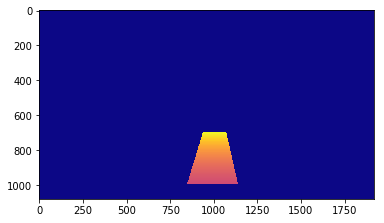

In [4]:
import glob
import cv2
import numpy as np
import PIL
import math
from matplotlib import cm
from imageio import imread
import pysnooper
import os
import matplotlib.pyplot as plt
import scipy.misc
import pdb
from skimage.io import imsave
from PIL import Image, ImageDraw
import numpy as np
from imageio import imread
import glob
import skimage.transform

import os
n = 0
video_focals = np.array([1801.5909135560134, 1173.995655488004, 1405.680431915585, 2444.7489844113907, 1442.9957867466278, 1236.3128201089055, 2094.9021200603393, 2106.4200881871634])

for file in glob.glob("/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/left_right_rails/*.png"):
    n += 1
    im = cv2.imread(file)
    print(file,'      ', n)

    blue_line = np.zeros([1000, 2])

    color = (0, 0, 255)
    im = Image.fromarray(im, 'RGB')
    i = 0
    for x in range(im.size[0]):
        for y in range(im.size[1]):
            r, g, b = im.getpixel((x, y))
            if (r, g, b) == color:
                blue_line[i] = [x, y]
                i = i + 1
    blue_line = blue_line[~np.all(blue_line == 0, axis=1)]
    
    red_line = np.zeros([1000, 2])
    color = (255, 0, 0)

    j = 0
    for x in range(im.size[0]-1,0, -1):
        for y in range(im.size[1]):

            r, g, b = im.getpixel((x, y))
            if (r, g, b) == color:
                red_line[j] = [x, y]
                j = j + 1
    red_line = red_line[~np.all(red_line == 0, axis=1)]
    
    itemindex = 0
    if red_line[:100,1][0] > blue_line[:100,1][0]:
        for i in range(red_line[:100,1].shape[0]):
            itemindex = np.where(blue_line[:100,1]==red_line[:100,1][i])
            if itemindex !=0:
                break
        blue_line = blue_line[15:]
    else:
        for i in range(blue_line[:100,1].shape[0]):
            itemindex = np.where(red_line[:100,1]==blue_line[:100,1][i])
            if itemindex !=0:
                break
                
                
    if red_line.shape[0] > blue_line.shape[0]:
        red_line = red_line[:blue_line.shape[0],:]
    else:
        blue_line = blue_line[:red_line.shape[0],:]
        
    a = red_line
    b = blue_line

    red_blue = np.empty((red_line.shape[0] + blue_line.shape[0], red_line.shape[1]), dtype=red_line.dtype)
    red_blue[0::2] = red_line
    red_blue[1::2] = blue_line

    # put them in a txt file 
    np.savetxt('test.txt', red_blue, delimiter=' ')
    np.savetxt('right_test.txt', red_line, delimiter=' ')
    np.savetxt('left_test.txt', blue_line, delimiter=' ')
    
    txt1 = np.loadtxt('left_test.txt')
    txt2 = np.loadtxt('right_test.txt')

    depthcood = np.loadtxt('test.txt')

    
    dist = compute_distance(depthcood) # distance bin el point limin wel issar 
    distance = compute_distance_two_txt(txt1, txt2)

    z = compute_depth_two_txt(dist, 1039.7880938825083)

    minima = min(z)
    maxima = max(z)

    norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.Greys_r)

    #fill depth map
    im1 = np.zeros([1080, 1920])
    # fill_depth_map_two_txt(txt1, txt2, im1, z)
    fill_depth_map(depthcood, im1, z)
    base_name = os.path.splitext(os.path.basename(os.path.normpath(file)))[0]
    print('/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/'+ base_name)
    np.save('/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/'+ base_name, im1)

    disp_to_img = skimage.transform.resize(im1.squeeze(), [1080, 1920], mode='constant')
    
    cmap = plt.cm.plasma
    norm = plt.Normalize(vmin=disp_to_img.min(), vmax=disp_to_img.max())

    # map the normalized data to colors
    # image is now RGBA (512x512x4) 
    image = cmap(norm(disp_to_img))
    # mean of all images and max of all images
    plt.imshow(disp_to_img, cmap='plasma')
    base_name = os.path.splitext(os.path.basename(os.path.normpath(file)))[0]
    plt.imsave('/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/'+ base_name,image)
    # change to min and max of all the dataset
    



In [2]:
import glob
import cv2
import numpy as np
import PIL
import math
from matplotlib import cm
from imageio import imread
import pysnooper
import os
import matplotlib.pyplot as plt
import scipy.misc
import pdb
from skimage.io import imsave
from PIL import Image, ImageDraw
import numpy as np
from imageio import imread
import glob
import skimage.transform
for count, file in enumerate(glob.glob("/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/*.npy")):
#         print(count)
    print(file)
    base = os.path.splitext(os.path.basename(os.path.normpath(file)))[0]
    print(base)
#     if count != base:
#         print(count)
    


/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/10.npy
10
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/16.npy
16
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/23.npy
23
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/24.npy
24
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/25.npy
25
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/26.npy
26
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/39.npy
39
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/40.npy
40
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/41.npy
41
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/npy/42.npy
42
/home-local/video_data/NoInsidesorStopvideos/5/image_03/groundtruth/depth_map/np